In [1]:
from libs import uniswap_graphql, features
import matplotlib.pyplot as plt

rugpull_pair_id = "0x3eb09d108d1f61f10860b8bb1b13b5b4abc3f49d"
rugpull_token_id = "0xab2efe93fbe4426f54c3d678279e3033c0f3218f"

non_rugpull_pair_id = "0x3cd1c0b98be4451ca51265bbaeb76cf7b31e1c02"
non_rugpull_token_id = "0xdc99bdc0c6428addf4d1762560801f5d3447f9e0"


In [2]:
uniswap_graphql.pair_by_token(token=rugpull_token_id)

{'token0': {'symbol': 'GROW',
  'id': '0xab2efe93fbe4426f54c3d678279e3033c0f3218f'},
 'token1': {'symbol': 'WETH',
  'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'},
 'id': '0x3eb09d108d1f61f10860b8bb1b13b5b4abc3f49d',
 'reserve0': '1000027683552.524274009209609394',
 'reserve1': '0.000023104359262558',
 'totalSupply': '4532.090162831096616947',
 'reserveETH': '0.000023104359262558',
 'reserveUSD': '0.04568616876498932995326848829256579',
 'trackedReserveETH': '0.000046208718525116',
 'token0Price': '43283073648059529.50791647848159151',
 'token1Price': '0.00000000000000002310371966952102271221385854824557',
 'volumeToken0': '1000351376779.28893542700383637',
 'volumeToken1': '1909.358906220017582966',
 'volumeUSD': '550292.7841761321422192180209140723',
 'untrackedVolumeUSD': '715946.4256554514606901593479345943',
 'txCount': '1928',
 'createdAtTimestamp': '1602613390',
 'createdAtBlockNumber': '11048900',
 'liquidityProviderCount': '87'}

In [3]:
rugpull_pair = uniswap_graphql.pair_by_id(pair=rugpull_pair_id)
rugpull_token_index = features.get_token_index(rugpull_pair["token0"]["symbol"])
rugpull_pair

{'token0': {'symbol': 'GROW',
  'id': '0xab2efe93fbe4426f54c3d678279e3033c0f3218f'},
 'token1': {'symbol': 'WETH',
  'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'},
 'id': '0x3eb09d108d1f61f10860b8bb1b13b5b4abc3f49d',
 'reserve0': '1000027683552.524274009209609394',
 'reserve1': '0.000023104359262558',
 'totalSupply': '4532.090162831096616947',
 'reserveETH': '0.000023104359262558',
 'reserveUSD': '0.04568616876498932995326848829256579',
 'trackedReserveETH': '0.000046208718525116',
 'token0Price': '43283073648059529.50791647848159151',
 'token1Price': '0.00000000000000002310371966952102271221385854824557',
 'volumeToken0': '1000351376779.28893542700383637',
 'volumeToken1': '1909.358906220017582966',
 'volumeUSD': '550292.7841761321422192180209140723',
 'untrackedVolumeUSD': '715946.4256554514606901593479345943',
 'txCount': '1928',
 'createdAtTimestamp': '1602613390',
 'createdAtBlockNumber': '11048900',
 'liquidityProviderCount': '87'}

In [4]:
rugpull_liquidity_snapshots = uniswap_graphql.liquidity_snapshots(pair=rugpull_pair_id)
rugpull_liquidity = [float(entry['reserveUSD']) for entry in rugpull_liquidity_snapshots]
rugpull_prices = [float(entry[f'''token{rugpull_token_index}PriceUSD''']) for entry in rugpull_liquidity_snapshots]
rugpull_blocks = [int(entry['block']) for entry in rugpull_liquidity_snapshots]

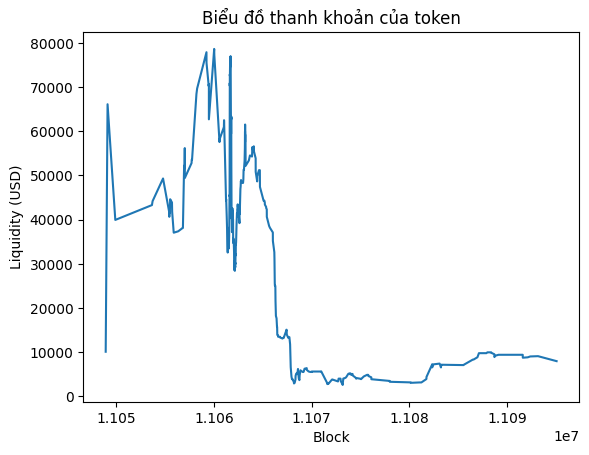

In [5]:
plt.plot(rugpull_blocks, rugpull_liquidity)
plt.xlabel('Block')
plt.ylabel('Liquidity (USD)')
plt.title(f'''Biểu đồ thanh khoản của token''')

plt.show()

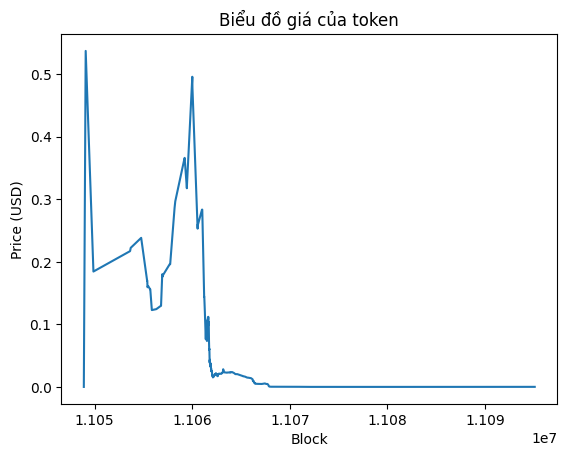

In [6]:
# Vẽ biểu đồ

# plt.scatter([blocks,blocks[1]], [prices[0], prices[1]])
plt.plot(rugpull_blocks, rugpull_prices)
plt.xlabel('Block')
plt.ylabel('Price (USD)')
plt.title('Biểu đồ giá của token')

plt.show()

In [7]:
non_rugpull_pair = uniswap_graphql.pair_by_id(non_rugpull_pair_id)
non_rugpull_token_index = features.get_token_index(non_rugpull_pair["token0"]["symbol"])

In [8]:
uniswap_graphql.pair_by_token(non_rugpull_token_id)

{'token0': {'symbol': 'WETH',
  'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'},
 'token1': {'symbol': 'WBCB',
  'id': '0xdc99bdc0c6428addf4d1762560801f5d3447f9e0'},
 'id': '0x3cd1c0b98be4451ca51265bbaeb76cf7b31e1c02',
 'reserve0': '15.187310061160837556',
 'reserve1': '22705.69647226579790345',
 'totalSupply': '551.725710191281525967',
 'reserveETH': '30.374620122321675112',
 'reserveUSD': '70036.04403418766893546407123140283',
 'trackedReserveETH': '30.374620122321675112',
 'token0Price': '0.0006688766442250118856560358361660607',
 'token1Price': '1495.043979534733664622001254885111',
 'volumeToken0': '23872.908740599249102183',
 'volumeToken1': '110011.653051296816564828',
 'volumeUSD': '16935611.35540883030234808907294128',
 'untrackedVolumeUSD': '17421463.83791038415727034098221658',
 'txCount': '11791',
 'createdAtTimestamp': '1608110045',
 'createdAtBlockNumber': '11463235',
 'liquidityProviderCount': '1398'}

In [9]:
non_rugpull_liquidity_snapshots = uniswap_graphql.liquidity_snapshots(pair=non_rugpull_pair_id)
non_rugpull_liquidity = [float(entry['reserveUSD']) for entry in non_rugpull_liquidity_snapshots]
non_rugpull_prices = [float(entry[f'''token{non_rugpull_token_index}PriceUSD''']) for entry in non_rugpull_liquidity_snapshots]
non_rugpull_blocks = [int(entry['block']) for entry in non_rugpull_liquidity_snapshots]

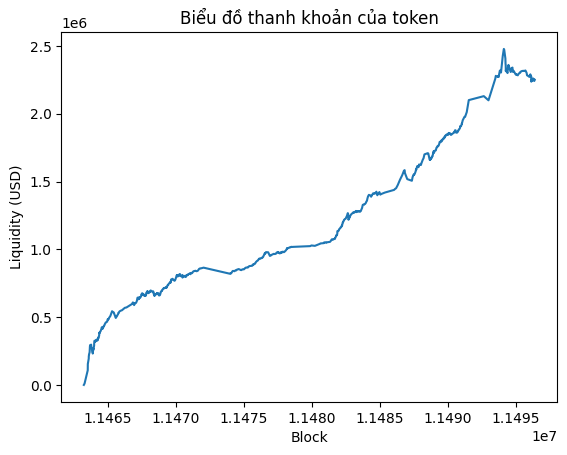

In [10]:
plt.plot(non_rugpull_blocks, non_rugpull_liquidity)
plt.xlabel('Block')
plt.ylabel('Liquidity (USD)')
plt.title(f'''Biểu đồ thanh khoản của token''')

plt.show()

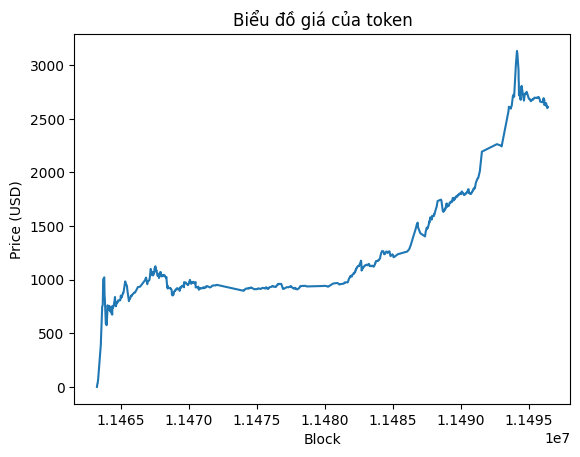

In [11]:
plt.plot(non_rugpull_blocks, non_rugpull_prices)
plt.xlabel('Block')
plt.ylabel('Price (USD)')
plt.title('Biểu đồ giá của token')

plt.show()

In [13]:
uniswap_graphql.pair_by_id("0x3cd1c0b98be4451ca51265bbaeb76cf7b31e1c02")

{'token0': {'symbol': 'WETH',
  'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'},
 'token1': {'symbol': 'WBCB',
  'id': '0xdc99bdc0c6428addf4d1762560801f5d3447f9e0'},
 'id': '0x3cd1c0b98be4451ca51265bbaeb76cf7b31e1c02',
 'reserve0': '15.187310061160837556',
 'reserve1': '22705.69647226579790345',
 'totalSupply': '551.725710191281525967',
 'reserveETH': '30.374620122321675112',
 'reserveUSD': '70036.04403418766893546407123140283',
 'trackedReserveETH': '30.374620122321675112',
 'token0Price': '0.0006688766442250118856560358361660607',
 'token1Price': '1495.043979534733664622001254885111',
 'volumeToken0': '23872.908740599249102183',
 'volumeToken1': '110011.653051296816564828',
 'volumeUSD': '16935611.35540883030234808907294128',
 'untrackedVolumeUSD': '17421463.83791038415727034098221658',
 'txCount': '11791',
 'createdAtTimestamp': '1608110045',
 'createdAtBlockNumber': '11463235',
 'liquidityProviderCount': '1398'}